In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
test = pd.read_pickle('Data/nn_challenge_test.pkl')

In [3]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.485838,0.5,0.0,NaN,0.364916,0.000682,0.000000,0.559775,0.000692,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.471255,0.5,0.0,0.000000,0.432846,0.001364,0.089721,0.740107,0.002308,0.333333,...,0.026009,0.074658,0.003963,1.0000,0.025595,0.106699,0.020597,0.002580,0.0,1
2,0.619600,0.5,0.0,0.000000,0.208381,0.002046,0.424221,0.668134,0.000857,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
3,0.600626,1.0,0.0,0.000018,0.146909,0.015007,0.583363,0.858019,0.001088,0.500000,...,0.176415,0.238134,0.005945,0.8077,0.043148,0.250982,0.199603,0.004473,0.0,1
4,0.642833,1.0,0.0,0.000259,0.177191,0.042974,0.583363,0.691851,0.000956,0.750000,...,0.211176,0.106760,0.001321,0.7500,0.122571,0.238861,0.106760,0.005346,0.0,1


In [4]:
test.shape

(270955, 219)

In [5]:
test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
count,270955.000000,270955.000000,270955.000000,250181.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,256720.000000,...,270953.000000,270953.000000,270953.000000,270953.000000,270953.000000,270953.000000,270953.000000,270953.000000,270955.000000,270955.000000
mean,0.531509,0.542343,0.004451,0.000623,0.264955,0.015471,0.260535,0.714508,0.001931,0.481114,...,0.080545,0.090136,0.003586,0.570143,0.040631,0.164895,0.056884,0.005307,0.656020,0.851614
std,0.096807,0.327484,0.018279,0.008677,0.113911,0.026586,0.150670,0.118082,0.006149,0.326485,...,0.090913,0.116549,0.009982,0.360794,0.044904,0.134179,0.104468,0.018768,0.475035,0.355483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466028,0.500000,0.000000,0.000000,0.179241,0.001364,0.166725,0.644618,0.000791,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.531518,0.500000,0.000000,0.000045,0.245392,0.006821,0.233345,0.734936,0.001154,0.500000,...,0.058804,0.047344,0.001982,0.708350,0.036314,0.153552,0.020597,0.002502,1.000000,1.000000
75%,0.597024,1.000000,0.000000,0.000131,0.331939,0.017735,0.343134,0.803433,0.001979,0.666667,...,0.111329,0.121475,0.003963,0.833350,0.051874,0.243327,0.035454,0.004662,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
test.dtypes.value_counts()

float32     197
float64      10
category      1
category      1
category      1
category      1
category      1
category      1
category      1
object        1
category      1
category      1
category      1
int32         1
dtype: int64

In [7]:
category_columns = test.select_dtypes(include=['object', 'category']).columns

In [8]:
test_copy = test.copy()

In [9]:
le = LabelEncoder()

test_copy[category_columns] = test_copy[category_columns].apply(lambda col: le.fit_transform(col))

In [10]:
test_copy.dtypes.value_counts()

float32    197
int32       12
float64     10
dtype: int64

In [11]:
test_copy.isnull().sum()

feature_1          0
feature_2          0
feature_3          0
feature_4      20774
feature_5          0
               ...  
feature_215        2
feature_216        2
feature_217        2
feature_218        0
target             0
Length: 219, dtype: int64

In [12]:
nans = test_copy.columns[test_copy.isnull().any()]

In [13]:
for col in nans:

    test_copy[col].fillna(test_copy[col].mean(), inplace = True)

In [14]:
test_copy.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_215    0
feature_216    0
feature_217    0
feature_218    0
target         0
Length: 219, dtype: int64

In [15]:
#correlation_matrix = test_copy.corr()

In [16]:
# a = 0.8

# highly_correlated = []

# for i in range(len(correlation_matrix.columns)):

#     for j in range(i+1, len(correlation_matrix.columns)):

#         if abs(correlation_matrix.iloc[i, j]) >= a:

#             highly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

In [17]:
# highly_correlated

In [18]:
# print(len(highly_correlated))

In [19]:
# cols_remove = {pair[1] for pair in highly_correlated}

# test_copy.drop(columns = cols_remove, inplace = True)

In [20]:
test_copy.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.485838,0.5,0.0,0.000623,0.364916,0.000682,0.000000,0.559775,0.000692,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.471255,0.5,0.0,0.000000,0.432846,0.001364,0.089721,0.740107,0.002308,0.333333,...,0.026009,0.074658,0.003963,1.0000,0.025595,0.106699,0.020597,0.002580,0.0,1
2,0.619600,0.5,0.0,0.000000,0.208381,0.002046,0.424221,0.668134,0.000857,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0,1
3,0.600626,1.0,0.0,0.000018,0.146909,0.015007,0.583363,0.858019,0.001088,0.500000,...,0.176415,0.238134,0.005945,0.8077,0.043148,0.250982,0.199603,0.004473,0.0,1
4,0.642833,1.0,0.0,0.000259,0.177191,0.042974,0.583363,0.691851,0.000956,0.750000,...,0.211176,0.106760,0.001321,0.7500,0.122571,0.238861,0.106760,0.005346,0.0,1


In [21]:
test_copy.to_pickle('test_clean.pkl')

<Axes: xlabel='target', ylabel='Count'>

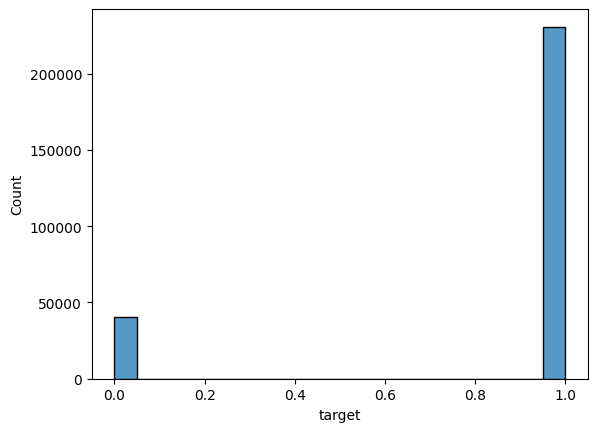

In [22]:
import seaborn as sns

sns.histplot(test_copy.target)